# Wrangling of Data


This step focuses on collecting your data, organizing it, and making sure it's well defined. The purpose of this data science project is to come up with a pricing model for mortgage principal amount based on mortgagee's application. 

This phase consists 4 steps:

1. Introduction and Importing packages and dataset
2. Data Cleaning
3. Outliers
4. Summary and future steps for next phase

## 1. Introduction
#### History of Dataset

The loan-level Public Use Databases (PUDBs) are released annually to meet FHFA’s requirement under 12 U.S.C. 4543 and 4546(d) to publicly disclose data about the Enterprises’ single-family and multifamily mortgage acquisitions.  The datasets supply mortgage lenders, planners, researchers, policymakers, and housing advocates with information concerning the flow of mortgage credit in America’s neighborhoods.  Beginning with data for mortgages acquired in 2018, FHFA has ordered that the PUDBs be expanded to include additional data that is the same as the data definitions used by the regulations implementing the Home Mortgage Disclosure Act, as required by 12 U.S.C. 4543(a)(2) and 4546(d)(1).

The PUDB single-family datasets include loan-level records that include data elements on the income, race, and gender of each borrower as well as the census tract location of the property, loan-to-value (LTV) ratio, age of mortgage note, and affordability of the mortgage.  New for 2018 are the inclusion of the borrower’s debt-to-income (DTI) ratio and detailed LTV ratio data at the census tract level.  The PUDB multifamily property-level datasets include information on the unpaid principal balance and type of seller/servicer from which the Enterprise acquired the mortgage.  New for 2018 is the inclusion of property size data at the census tract level.  The multifamily unit-class files also include information on the number and affordability of the units in the property.  Both the single-family and multifamily datasets include indicators of whether the purchases are from “underserved” census tracts, as defined in terms of median income and minority percentage of population.

Prior to 2010 the single-family PUDB consisted of three files: Census Tract, National A, and National B files.  With the 2010 PUDB a fourth file, National C, was added to provide information on high-cost mortgages acquired by the Enterprises.  The single-family Census Tract file includes information on the location of the property based on the 2010 Census (beginning in 2012), while the National files contain other information but lack detailed geographic information in order to protect Enterprise proprietary data.  The multifamily datasets also consist of a Census Tract file, and a National file without detailed geographic information.

#### Imports and Load Data

In [1]:
# Import necessary packages for this phase of project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('2019_PUDB_EXPORT_123119.csv')
df.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2019,2407198,Boston,50,7,15540,34.0,4.577,132474,84290,...,7,7,7,5,8,8,8,8,2,1
1,2019,2407199,Boston,50,7,15540,29.0,3.421,100795,84290,...,7,7,7,2,7,7,7,7,2,1
2,2019,2407200,Boston,50,15,99999,9532.0,6.152,49625,67566,...,7,7,7,2,7,7,7,7,2,1
3,2019,2407201,Boston,50,17,30100,9594.0,3.935,62643,67105,...,7,7,7,2,7,7,7,7,2,1
4,2019,2407202,Boston,23,31,38860,254.0,6.031,87679,76445,...,7,7,7,5,8,8,8,8,2,1


## 2. Data Cleaning
#### Explore Data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89767 entries, 0 to 89766
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             89767 non-null  int64  
 1   LoanCharacteristicsID            89767 non-null  int64  
 2   Bank                             89767 non-null  object 
 3   FIPSStateNumericCode             89767 non-null  int64  
 4   FIPSCountyCode                   89767 non-null  int64  
 5   CoreBasedStatisticalAreaCode     89767 non-null  int64  
 6   CensusTractIdentifier            89767 non-null  float64
 7   CensusTractMinorityRatioPercent  89767 non-null  float64
 8   CensusTractMedFamIncomeAmount    89767 non-null  int64  
 9   LocalAreaMedianIncomeAmount      89767 non-null  int64  
 10  TotalMonthlyIncomeAmount         89767 non-null  int64  
 11  HUDMedianIncomeAmount            89767 non-null  int64  
 12  LoanAcquisitionAct

In [4]:
# finding the percentage of missing data
df.isnull().sum()/df.count()

Year                               0.0
LoanCharacteristicsID              0.0
Bank                               0.0
FIPSStateNumericCode               0.0
FIPSCountyCode                     0.0
CoreBasedStatisticalAreaCode       0.0
CensusTractIdentifier              0.0
CensusTractMinorityRatioPercent    0.0
CensusTractMedFamIncomeAmount      0.0
LocalAreaMedianIncomeAmount        0.0
TotalMonthlyIncomeAmount           0.0
HUDMedianIncomeAmount              0.0
LoanAcquisitionActualUPBAmt        0.0
LTVRatioPercent                    0.0
NoteDate                           0.0
LoanAcquistionDate                 0.0
LoanPurposeType                    0.0
ProductCategoryName                0.0
MortgageType                       0.0
ScheduledTotalPaymentCount         0.0
LoanAmortizationMaxTermMonths      0.0
MortgageLoanSellerInstType         0.0
BorrowerCount                      0.0
BorrowerFirstTimeHomebuyer         0.0
Borrower1Race1Type                 0.0
Borrower2Race1Type       

In [5]:
# I will create a copy of dataset so we have the original copy if we need it in future.

df_copy = df.copy()

#### Data Cleaning

Although the above results suggest that the dataset has no missing data, by looking deeper in the Federal Home Loan Banks documentation attached to this dataset, we can see that some columns will have value like "999" or "99" for missing or not available data. For example, the "Borrower1CreditcoreValue" feature has 9 as missing value. Therefore, each feature must study deeper for better understand and see why the data are missing and how to be dealt. First, let's take a look at the "object" data.

In [6]:
df.select_dtypes('object')

,Bank,PropertyType,PrepaymentPenaltyExpirationDate
0,Boston,PT01,9999-12-31
1,Boston,PT01,9999-12-31
2,Boston,PT01,9999-12-31
3,Boston,PT01,9999-12-31
4,Boston,PT01,9999-12-31
...,...,...,...
89762,Topeka,PT01,9999-12-31
89763,Topeka,PT01,9999-12-31
89764,Topeka,PT01,9999-12-31
89765,Topeka,PT01,9999-12-31


Since there are only three object type column, we can analyze it deeper to have a better understanding from this type first. To do so, we can see what the values of unique instances  in each column. The reason for that is, by looking at the ablove data, we can see "PropertyType" and "PrepaymentPenaltyExpirationDate" might have only one unique value.

Additionally, "PrepaymentPenaltyExpirationDate" values are strange since there is no year 9999 yet. So that might be missing data. 

In [7]:
print(df.Bank.value_counts())

Chicago          22462
Topeka           16093
Des Moines       14468
Cincinnati       11250
Dallas            8069
Indianapolis      5677
Pittsburgh        4458
Boston            2824
San Francisco     2487
New York          1979
Name: Bank, dtype: int64


In [8]:
print(df.PropertyType.value_counts())

PT01    67614
PT07    15800
PT06     4773
PT04      739
PT03      380
PT12      152
PT05      113
PT09       95
PT11       50
PT10       35
PT08        9
PT02        7
Name: PropertyType, dtype: int64


We can see that Bank and Property Type columns are fine.

In [9]:
print(df.PrepaymentPenaltyExpirationDate.value_counts())

9999-12-31    89767
Name: PrepaymentPenaltyExpirationDate, dtype: int64


This observation suggests that all of the data in this column are missing. Or by looking at the documents, we can see they report 9999-12- 31 if Prepayment Penalty Expiration Date is not applicable. Therefore, we can drop this column. Besides that, none of our object type data have missing values.

In [10]:
# Droping the PrepaymentPenaltyExpirationDate column

df = df.drop('PrepaymentPenaltyExpirationDate', axis=1)

Now, we can tackle the numeric columns. although most of our columns are numerics there mostly categorical data. As we can see below, most of the column has less than 11 unique values.

In [11]:
num_col = len(df.columns)
cat_list = []
for i in range(num_col):
    if df.iloc[:,i].nunique() < 11:
        cat_list.append(df.columns[i])
len(cat_list)

33

Now it's time to see how our numeric data looks like. 

To do so, I will divide the numeric features into three different categories:

1. categories with only one unique value these columns will only confirm facts. For example, the Year column confrim the fact the dataset only contains the data for 2019.

2. The columns with value "9999, 999, 998 & else": In this case, we will first replace these values with NaN value and then based on the percentage of missing values decide to keep or drop them accordingly.

3. This category is probably the hardest one since it includes data for race of the borrower and in some case there is no second borrower, but also in some case we do not have enough information. Therefore, this category need more attention and we have to dig deeper.

In [12]:
df.Year.nunique()

1

The first two columns, Year and Loan ID does not add any information in this project. As mentioned above the year column has only have one value and the loan Id also is a random number where here has no meaning. So let's move to second category.
Therefore we will drop them.

In [13]:
df = df.drop(['Year', 'LoanCharacteristicsID'], axis=1)

Firstly, we will see which column has value "9" and then see whether that's a missing value or not.

In [14]:
df.isin([9]).sum(axis=0)

Bank                                   0
FIPSStateNumericCode                 305
FIPSCountyCode                      1063
CoreBasedStatisticalAreaCode           0
CensusTractIdentifier                247
CensusTractMinorityRatioPercent      501
CensusTractMedFamIncomeAmount          0
LocalAreaMedianIncomeAmount            0
TotalMonthlyIncomeAmount               0
HUDMedianIncomeAmount                  0
LoanAcquisitionActualUPBAmt            0
LTVRatioPercent                        5
NoteDate                               0
LoanAcquistionDate                     0
LoanPurposeType                        0
ProductCategoryName                    0
MortgageType                           0
ScheduledTotalPaymentCount             0
LoanAmortizationMaxTermMonths          0
MortgageLoanSellerInstType           229
BorrowerCount                          0
BorrowerFirstTimeHomebuyer             0
Borrower1Race1Type                     0
Borrower2Race1Type                     0
Borrower1GenderT

The first few columns with 9 values are fine since those values represent specific code or a ratio.

There are three columns with value 9:

1. Mortgage Loan Seller Inst Type
        This is not a missing value. As the documentation suggests 9 represent other category
       
2. Borrower1CreditScoreValue
        These values are missing, so we can replace them with nan and then decide to replace or drop them.
       
3. Borrower2CreditScoreValue
        These values are missing or not applicable values, however, they represent almost 40% of data need to dig deeper. 

Since Both MortgageLoanSellerInstType and HousingExpenseRatioPercent have a same number of 9 values, I will check to see if the values are related or random. As we see below, they are random.

In [15]:
df.loc[(df.Borrower1CreditScoreValue == 9) & (df.Borrower2CreditScoreValue == 9),'BorrowerCount'].value_counts()

1    70
2    44
3     1
Name: BorrowerCount, dtype: int64

In [16]:
df[df.MortgageLoanSellerInstType  == 9]

,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,HUDMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
827,Boston,9,3,25540,4622.01,11.168,142763,92999,22846,98400,...,7,7,7,2,7,7,7,7,2,1
45627,Des Moines,46,83,43620,101.02,6.489,106125,74891,20187,78700,...,7,7,7,2,7,7,7,7,2,1
45628,Des Moines,46,87,43620,9646.00,2.179,70208,74891,11294,78700,...,7,7,7,2,7,7,7,7,2,1
45629,Des Moines,46,125,43620,9651.00,4.220,70216,74891,4163,78700,...,7,7,7,5,8,8,8,8,2,1
45630,Des Moines,46,29,47980,9541.00,3.565,72045,69515,5475,70000,...,7,7,7,2,7,7,7,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85566,Topeka,20,131,99999,4802.00,2.025,70268,72823,2426,74600,...,7,7,7,5,8,8,8,8,2,1
85567,Topeka,20,131,99999,4802.00,2.025,70268,72823,10279,74600,...,7,7,7,2,7,7,7,7,2,1
85568,Topeka,20,131,99999,4802.00,2.025,70268,72823,10179,74600,...,7,7,7,2,7,7,7,7,2,1
85569,Topeka,20,131,99999,4803.00,4.329,71196,72823,9440,74600,...,7,7,7,2,7,7,7,7,2,1


In [17]:
df[df.HousingExpenseRatioPercent  == 9]

,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,HUDMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
4835,Chicago,22,105,25220,9547.00,18.881,67675,55729,8558,63300,...,7,7,7,5,8,8,8,8,2,1
12597,Chicago,17,177,23300,2.00,2.171,63009,62123,5395,66300,...,7,7,7,5,8,8,8,8,2,1
13162,Chicago,17,179,37900,216.03,3.686,113164,72677,9913,76900,...,7,7,7,2,7,7,7,7,2,1
17356,Chicago,55,85,99999,9709.00,5.290,65313,66336,9434,68400,...,7,7,7,2,7,7,7,7,2,1
18053,Chicago,55,113,99999,1005.00,4.066,67917,64707,14218,68400,...,7,7,7,5,8,8,8,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60112,Indianapolis,18,59,26900,4110.00,7.510,72021,66803,16139,75100,...,7,7,7,2,7,7,7,7,2,1
69743,Pittsburgh,42,127,99999,9606.00,5.441,64873,64992,4871,66700,...,7,7,7,2,7,7,7,7,2,1
73936,Topeka,40,35,99999,3732.00,33.002,54911,52768,6680,56700,...,7,7,7,2,7,7,7,7,2,1
79325,Topeka,8,87,22820,4.00,39.163,48068,64651,13654,68100,...,7,7,7,2,7,7,7,7,2,1


Secondly, we will see which column has value "99" and then see whether that's a missing value or not.

In [18]:
df.isin([99]).sum(axis=0)

Bank                                   0
FIPSStateNumericCode                   0
FIPSCountyCode                       978
CoreBasedStatisticalAreaCode           0
CensusTractIdentifier                 47
CensusTractMinorityRatioPercent        3
CensusTractMedFamIncomeAmount          0
LocalAreaMedianIncomeAmount            0
TotalMonthlyIncomeAmount               0
HUDMedianIncomeAmount                  0
LoanAcquisitionActualUPBAmt            0
LTVRatioPercent                      708
NoteDate                               0
LoanAcquistionDate                     0
LoanPurposeType                        0
ProductCategoryName                    0
MortgageType                           0
ScheduledTotalPaymentCount             1
LoanAmortizationMaxTermMonths          1
MortgageLoanSellerInstType             0
BorrowerCount                          0
BorrowerFirstTimeHomebuyer             0
Borrower1Race1Type                     0
Borrower2Race1Type                     0
Borrower1GenderT

"FIPSCountyCode" , "CensusTractIdentifier" , "LTVRatioPercent" , "ScheduledTotalPaymentCount" & "LoanAmortizationMaxTermMonths" are fine. As we can see below the 99 is a value in the range of each category. 
There is only one column with 99 values: "IndexSourceType" 

Text(0.5, 1.0, 'Loan to Value Ratio')

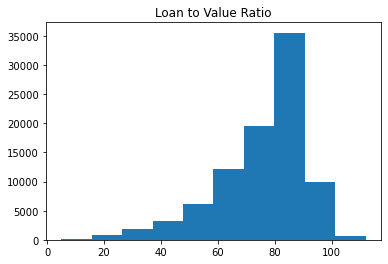

In [19]:
plt.hist(df.LTVRatioPercent)
plt.title('Loan to Value Ratio')

Text(0.5, 1.0, 'Total Payment Count')

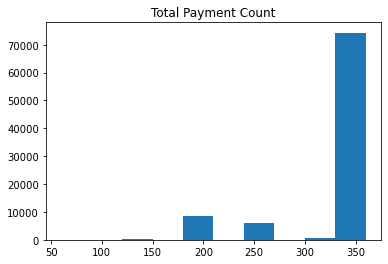

In [20]:
plt.hist(df.ScheduledTotalPaymentCount)
plt.title('Total Payment Count')

Text(0.5, 1.0, 'Loan Amortization Max Term Months')

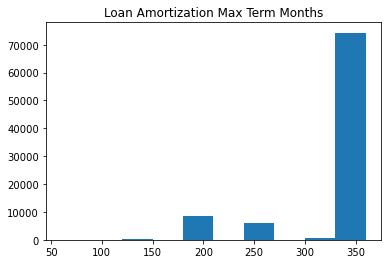

In [21]:
plt.hist(df.LoanAmortizationMaxTermMonths)
plt.title('Loan Amortization Max Term Months')

In [22]:
df.IndexSourceType.value_counts()

99    89767
Name: IndexSourceType, dtype: int64

As we can see all of the values in Index Source Type column are missing so we can drop this column as well.

In [23]:
df = df.drop('IndexSourceType', axis=1)

Thirdly, we will see which column has value "998" and then see whether that's a missing value or not.

In [24]:
df.isin([998]).sum(axis=0)

Bank                                   0
FIPSStateNumericCode                   0
FIPSCountyCode                         0
CoreBasedStatisticalAreaCode           0
CensusTractIdentifier                  0
CensusTractMinorityRatioPercent        0
CensusTractMedFamIncomeAmount          0
LocalAreaMedianIncomeAmount            0
TotalMonthlyIncomeAmount               0
HUDMedianIncomeAmount                  0
LoanAcquisitionActualUPBAmt            0
LTVRatioPercent                        0
NoteDate                               0
LoanAcquistionDate                     0
LoanPurposeType                        0
ProductCategoryName                    0
MortgageType                           0
ScheduledTotalPaymentCount             0
LoanAmortizationMaxTermMonths          0
MortgageLoanSellerInstType             0
BorrowerCount                          0
BorrowerFirstTimeHomebuyer             0
Borrower1Race1Type                     0
Borrower2Race1Type                     0
Borrower1GenderT

Again we have an interesting result regarding the second borrower. So we have to take a look at that in deeper manner.

In [25]:
df.BorrowerCount.value_counts()

2    51372
1    37910
3      401
4       83
5        1
Name: BorrowerCount, dtype: int64

There are two groups :

1. Only one borrower : 37910

2. More than one borrower : 51857

Now let's take a look at the borrowers' race and gender.

In [26]:
df.Borrower1Race1Type.value_counts()

5    76982
6     7352
2     3128
3     1677
1      516
4      112
Name: Borrower1Race1Type, dtype: int64

All the values with 6 is missing. But by looking at the second borrower data, we see interesting result that the number 37965 appears again.  

In [27]:
df.Borrower2Race1Type.value_counts()

5    44821
8    37965
6     4502
2     1577
3      638
1      199
4       64
7        1
Name: Borrower2Race1Type, dtype: int64

In [28]:
df.Borrower2GenderType.value_counts()

2    38527
4    37965
1    10569
3     2647
6       59
Name: Borrower2GenderType, dtype: int64

In [29]:
df.Borrower2EthnicityType.value_counts()

2    44822
5    37965
3     4983
1     1981
4       16
Name: Borrower2EthnicityType, dtype: int64

In [30]:
df.Borrower2Race2Type.value_counts()

7    45320
8    37965
6     6260
5      196
3        9
4        8
2        7
1        2
Name: Borrower2Race2Type, dtype: int64

The above calculations suggests that probably the number of only 1 borrowe is wrong and some of the data entered by mistake.

The reason is that by looking at the number of Borrower 2 gender and ethnicity and Race2type, we can see the number of No Co-Borrower are all 37965. By Looking at below code we can see, all these borrower count enteres as 2. Therefore, we can assign 1 instead of 2.

In [31]:
df[(df.BorrowerCount > 1) & (df.Borrower2EthnicityType == 5)]['BorrowerCount']

1062     2
1188     2
2249     2
6638     2
17822    2
17894    2
18640    2
18659    2
19636    2
19855    2
20856    2
23577    2
43759    2
45570    2
46196    2
48828    2
48831    2
51786    2
51960    2
52979    2
53767    2
53776    2
53836    2
53880    2
53909    2
54170    2
54184    2
54315    2
55184    2
56437    2
58090    2
58770    2
65521    2
65879    2
66089    2
68654    2
70529    2
70637    2
72029    2
72776    2
73597    2
75576    2
77182    2
77364    2
77409    2
78646    2
81478    2
81893    2
82311    2
82610    2
83594    2
85325    2
85371    2
85383    2
88716    2
Name: BorrowerCount, dtype: int64

In [32]:
df[(df.BorrowerCount > 1) & (df.Borrower2AgeAtApplicationYears == 998)]['BorrowerCount']

1062     2
1188     2
2249     2
6638     2
17822    2
17894    2
18640    2
18659    2
19636    2
19855    2
20856    2
23577    2
43759    2
45570    2
46196    2
48828    2
48831    2
51786    2
51960    2
52979    2
53767    2
53776    2
53836    2
53880    2
53909    2
54170    2
54184    2
54315    2
55184    2
56437    2
58090    2
58770    2
65521    2
65879    2
66089    2
68654    2
70529    2
70637    2
72029    2
72776    2
73597    2
75576    2
77182    2
77364    2
77409    2
78646    2
81478    2
81893    2
82311    2
82610    2
83594    2
85325    2
85371    2
85383    2
88716    2
Name: BorrowerCount, dtype: int64

In [33]:
df[(df.BorrowerCount > 1) & (df.Borrower2AgeAtApplicationYears == 998)]['BorrowerCount'] == df[(df.BorrowerCount > 1) & (df.Borrower2EthnicityType == 5)]['BorrowerCount']

1062     True
1188     True
2249     True
6638     True
17822    True
17894    True
18640    True
18659    True
19636    True
19855    True
20856    True
23577    True
43759    True
45570    True
46196    True
48828    True
48831    True
51786    True
51960    True
52979    True
53767    True
53776    True
53836    True
53880    True
53909    True
54170    True
54184    True
54315    True
55184    True
56437    True
58090    True
58770    True
65521    True
65879    True
66089    True
68654    True
70529    True
70637    True
72029    True
72776    True
73597    True
75576    True
77182    True
77364    True
77409    True
78646    True
81478    True
81893    True
82311    True
82610    True
83594    True
85325    True
85371    True
85383    True
88716    True
Name: BorrowerCount, dtype: bool

In [34]:
# Changing the values to 1
df.loc[(df.BorrowerCount > 1) & (df.Borrower2EthnicityType == 5), 'BorrowerCount'] = 1

Fourthly, we will see which column has value "999" and then see whether that's a missing value or not.

In [35]:
df.isin([999]).sum(axis=0)

Bank                               0
FIPSStateNumericCode               0
FIPSCountyCode                     0
CoreBasedStatisticalAreaCode       0
CensusTractIdentifier              0
CensusTractMinorityRatioPercent    0
CensusTractMedFamIncomeAmount      0
LocalAreaMedianIncomeAmount        0
TotalMonthlyIncomeAmount           0
HUDMedianIncomeAmount              0
LoanAcquisitionActualUPBAmt        0
LTVRatioPercent                    0
NoteDate                           0
LoanAcquistionDate                 0
LoanPurposeType                    0
ProductCategoryName                0
MortgageType                       0
ScheduledTotalPaymentCount         0
LoanAmortizationMaxTermMonths      0
MortgageLoanSellerInstType         0
BorrowerCount                      0
BorrowerFirstTimeHomebuyer         0
Borrower1Race1Type                 0
Borrower2Race1Type                 0
Borrower1GenderType                0
Borrower2GenderType                0
Borrower1AgeAtApplicationYears     0
B

Regarding second borrower age with value 999, we can drop those since there are 4 values. But the ratio of housing expenses with that value we need to dig deeper. It might be an outlier.

In [36]:
df = df[df.Borrower2AgeAtApplicationYears != 999]

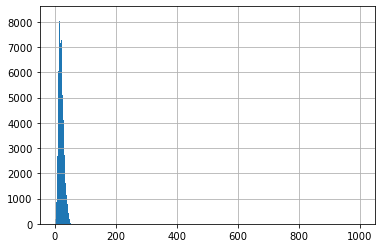

In [37]:
df.HousingExpenseRatioPercent.hist(bins=600)
plt.show()

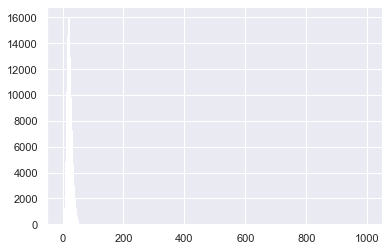

In [38]:
num_bins = int(np.sqrt(len(df.HousingExpenseRatioPercent)))

sns.set()

plt.hist(df.HousingExpenseRatioPercent, bins=num_bins)

plt.show()

This can be an outlier which we will fix it later.

Fifthly, we will see which column has value "99999" and then see whether that's a missing value or not.

In [39]:
df.isin([9999]).sum(axis=0)

Bank                                   0
FIPSStateNumericCode                   0
FIPSCountyCode                         0
CoreBasedStatisticalAreaCode           0
CensusTractIdentifier                  0
CensusTractMinorityRatioPercent        0
CensusTractMedFamIncomeAmount          0
LocalAreaMedianIncomeAmount            0
TotalMonthlyIncomeAmount              26
HUDMedianIncomeAmount                  0
LoanAcquisitionActualUPBAmt            0
LTVRatioPercent                        0
NoteDate                               0
LoanAcquistionDate                     0
LoanPurposeType                        0
ProductCategoryName                    0
MortgageType                           0
ScheduledTotalPaymentCount             0
LoanAmortizationMaxTermMonths          0
MortgageLoanSellerInstType             0
BorrowerCount                          0
BorrowerFirstTimeHomebuyer             0
Borrower1Race1Type                     0
Borrower2Race1Type                     0
Borrower1GenderT

The 9999 value in Margin Rate Percent column are considered as a category so they are not missing. However, in the monthly income column, this is a strange value.

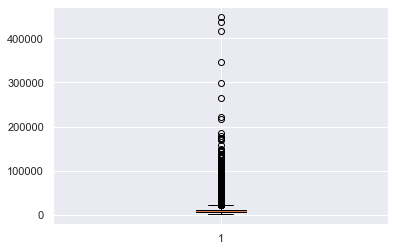

In [40]:
plt.boxplot(df.TotalMonthlyIncomeAmount);

By looking at the above box plot we can see those are outliers which we will tackle them at the end.
Sixthly, we will see which column has value "99999" and then see whether that's a missing value or not.

In [41]:
df.isin([99999]).sum(axis=0)

Bank                                  0
FIPSStateNumericCode                  0
FIPSCountyCode                        0
CoreBasedStatisticalAreaCode       9264
CensusTractIdentifier                 0
CensusTractMinorityRatioPercent       0
CensusTractMedFamIncomeAmount         0
LocalAreaMedianIncomeAmount           0
TotalMonthlyIncomeAmount              0
HUDMedianIncomeAmount                 0
LoanAcquisitionActualUPBAmt           0
LTVRatioPercent                       0
NoteDate                              0
LoanAcquistionDate                    0
LoanPurposeType                       0
ProductCategoryName                   0
MortgageType                          0
ScheduledTotalPaymentCount            0
LoanAmortizationMaxTermMonths         0
MortgageLoanSellerInstType            0
BorrowerCount                         0
BorrowerFirstTimeHomebuyer            0
Borrower1Race1Type                    0
Borrower2Race1Type                    0
Borrower1GenderType                   0


Based on the data documentation, if there is any missing data in this column, there are illustrated by 99999. So let's see what percentage of the data are not missing. Based on the documentation, the state/county/tract combo is not in a CBSA. Since this is feature is categorical, we can deal with this value as an "other" value.

In [42]:
(df.CoreBasedStatisticalAreaCode == 99999).sum()/ df.Bank.count()

0.10320510678119046

10% of data are missing. So we will consider 99999 values as other as documentation also suggests.

Now we will check to see if any value is missing in the loan type, and as we will see there are only three types:
1. Purchase
2. No-Cash Out Refinancing
6. Cash Out Refinancing

In [43]:
df.LoanPurposeType.value_counts()

1    40378
6    26776
2    22609
Name: LoanPurposeType, dtype: int64

In [44]:
df.ProductCategoryName.value_counts()

1    89763
Name: ProductCategoryName, dtype: int64

Again this column has only one value for all the instances and therefore it does not add any value to our analyss.

In [45]:
df = df.drop('ProductCategoryName', axis=1)

In [46]:
df.MortgageType.value_counts()

0    86447
3     1271
2     1033
1     1012
Name: MortgageType, dtype: int64

In [47]:
df.MortgageLoanSellerInstType.value_counts()

1    89534
9      229
Name: MortgageLoanSellerInstType, dtype: int64

As we can see above the 229 values are other with no further information. Again, we can consider this category as "Other."

We Can also see below that in some cases the Note Date and Loan date are different. This is not wrong, since the borrower can refinance and this dataset consider those mortgages as well. The only case we need to consider is that the Loan date most be after the note date since there is no way to refinance after the actual note date.

In [48]:
df.loc[df.NoteDate != df.LoanAcquistionDate, ['NoteDate', 'LoanAcquistionDate']]

,NoteDate,LoanAcquistionDate
0,2018,2019
2,2018,2019
3,2018,2019
4,2018,2019
9,2018,2019
...,...,...
83837,2017,2019
83841,2017,2019
83842,2017,2019
83871,2017,2019


In [49]:
df.loc[df.NoteDate > df.LoanAcquistionDate, ['NoteDate', 'LoanAcquistionDate']]

,NoteDate,LoanAcquistionDate


Which verifies the above hypothesis.

Now let's dig deeper in the special group of the columns. All columns that are related to borrowers will be grouped into three groups of race, gender and ethnicity. Then we will see if they have any missing values.


In [50]:
# Gender

gender = ['Borrower1GenderType', 'Borrower2GenderType']

ethnicity = ['Borrower1EthnicityType', 'Borrower2EthnicityType']

race = ['Borrower1Race1Type', 'Borrower1Race2Type', 'Borrower1Race3Type', 'Borrower1Race4Type', 'Borrower1Race5Type',
                'Borrower2Race1Type', 'Borrower2Race2Type', 'Borrower2Race3Type',  
                'Borrower2Race4Type', 'Borrower2Race5Type']

In [51]:
# Gender value counts

for i in gender:
    print(str(i) + " : \n" + str(df[i].value_counts()))

Borrower1GenderType : 
1    60389
2    25094
3     4217
6       63
Name: Borrower1GenderType, dtype: int64
Borrower2GenderType : 
2    38524
4    37965
1    10569
3     2646
6       59
Name: Borrower2GenderType, dtype: int64


Based on the documentation, all the values under category "3" are missing.  

In [52]:
# Ethnicity value counts

for i in ethnicity:
    print(str(i) + " : \n" + str(df[i].value_counts()))

Borrower1EthnicityType : 
2    77750
3     8009
1     3995
4        9
Name: Borrower1EthnicityType, dtype: int64
Borrower2EthnicityType : 
2    44819
5    37965
3     4982
1     1981
4       16
Name: Borrower2EthnicityType, dtype: int64


Again values under category "3" are missing.

In [53]:
# Race value counts

for i in race:
    print(str(i) + " : \n" + str(df[i].value_counts()))

Borrower1Race1Type : 
5    76979
6     7352
2     3127
3     1677
1      516
4      112
Name: Borrower1Race1Type, dtype: int64
Borrower1Race2Type : 
7    78061
6    11237
5      405
3       27
2       17
4       14
1        2
Name: Borrower1Race2Type, dtype: int64
Borrower1Race3Type : 
7    78496
6    11249
5       16
2        1
3        1
Name: Borrower1Race3Type, dtype: int64
Borrower1Race4Type : 
7    78512
6    11250
5        1
Name: Borrower1Race4Type, dtype: int64
Borrower1Race5Type : 
7    78513
6    11250
Name: Borrower1Race5Type, dtype: int64
Borrower2Race1Type : 
5    44818
8    37965
6     4501
2     1577
3      638
1      199
4       64
7        1
Name: Borrower2Race1Type, dtype: int64
Borrower2Race2Type : 
7    45316
8    37965
6     6260
5      196
3        9
4        8
2        7
1        2
Name: Borrower2Race2Type, dtype: int64
Borrower2Race3Type : 
7    45522
8    37965
6     6266
5        9
3        1
Name: Borrower2Race3Type, dtype: int64
Borrower2Race4Type : 
7    4

## 3.Outliers

After cleaning the data and working on all the missing data, now it's time to work on outliers.

First, let's use a histogram to see the distribution.

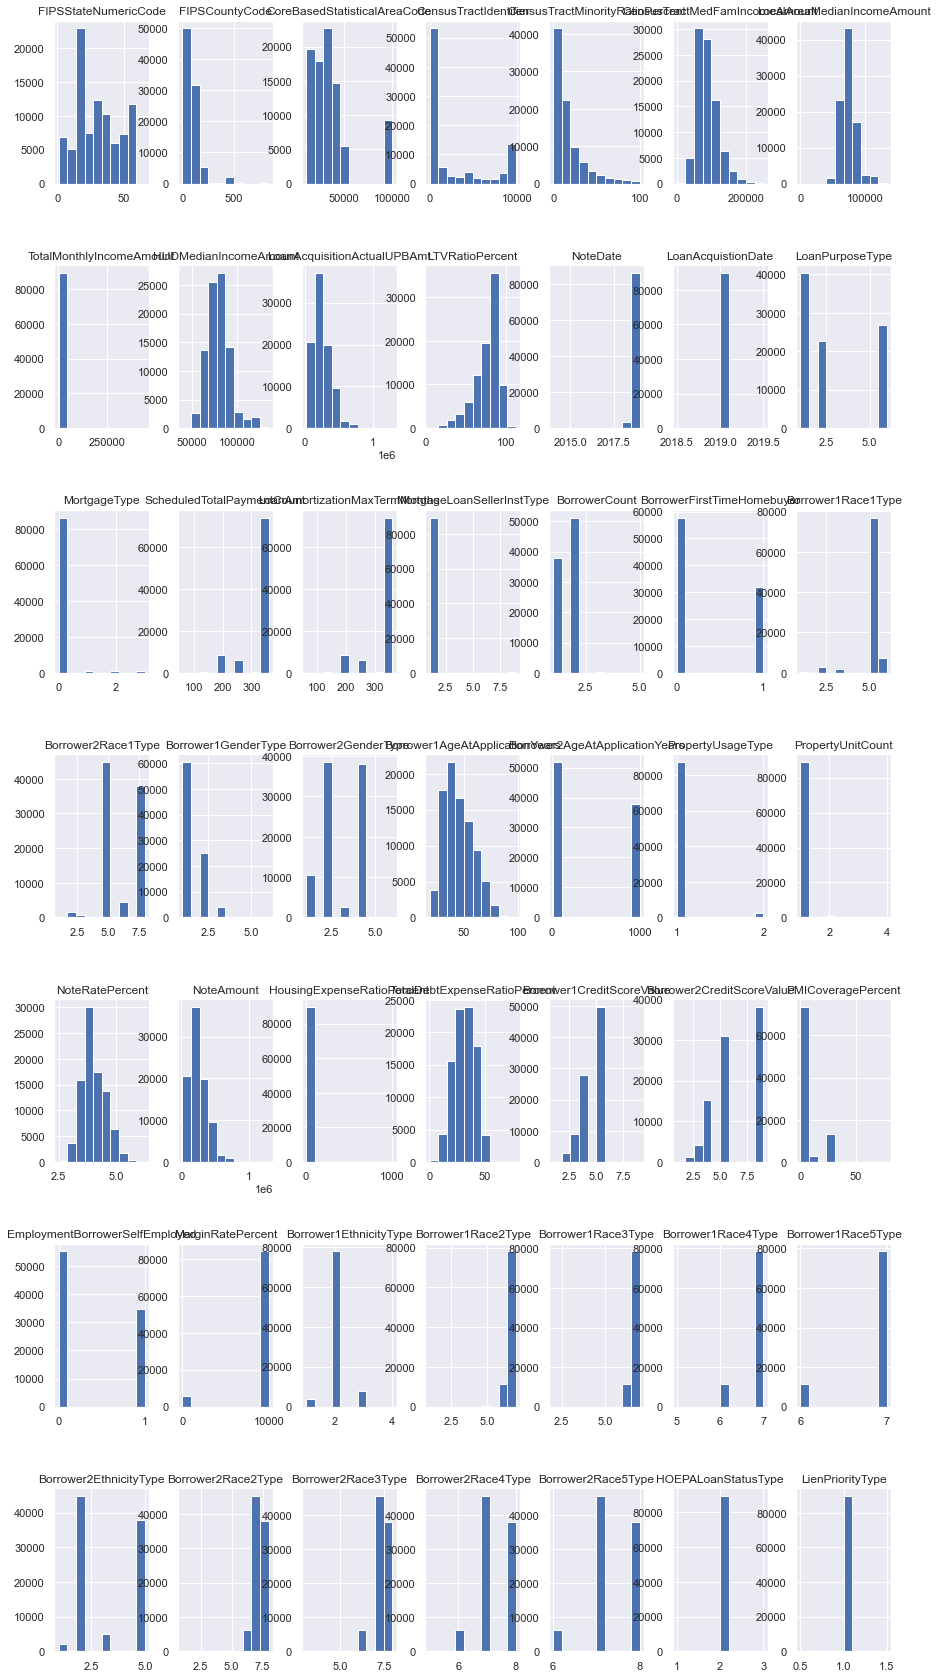

In [54]:
df.hist(figsize=(15, 30))
plt.subplots_adjust(hspace=.5);
plt.show()

Now, we can draw a boxplot for numeric features.

In [55]:
numeric_cols = ['CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount', 'TotalMonthlyIncomeAmount', 
               'HUDMedianIncomeAmount', 'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'ScheduledTotalPaymentCount',
                'LoanAmortizationMaxTermMonths']
print(len(numeric_cols))

8


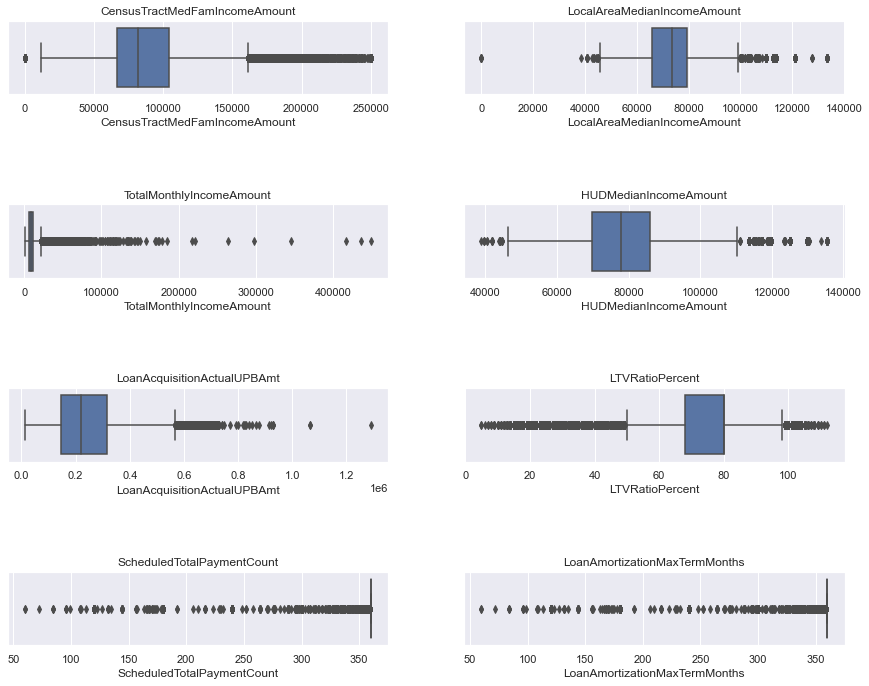

In [56]:

count = 1
plt.subplots(figsize=(15, 25))

for i in range(len(numeric_cols)):
    plt.subplot(8, 2, count)
    sns.boxplot(x=df[numeric_cols].iloc[:,i])
    plt.title(numeric_cols[i])
    plt.subplots_adjust(hspace=1.5)
    count +=1
    
plt.show()

In [57]:
from scipy.stats.mstats import winsorize

df_win = df[numeric_cols]

for col in numeric_cols:
    df_win[col] = winsorize(df[col], limits=(0, 0.05))

<ipython-input-57-91dcfbe38844>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win[col] = winsorize(df[col], limits=(0, 0.05))


In [58]:
df_win

,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,HUDMedianIncomeAmount,LoanAcquisitionActualUPBAmt,LTVRatioPercent,ScheduledTotalPaymentCount,LoanAmortizationMaxTermMonths
0,132474,84290,7308,93000,319113,95.0,360,360
1,100795,84290,7416,93000,248005,95.0,360,360
2,49625,67566,5143,71900,211105,95.0,360,360
3,62643,67105,8866,71900,210000,95.0,360,360
4,87679,76445,15240,90100,233200,80.0,180,180
...,...,...,...,...,...,...,...,...
89762,54688,69210,3275,70000,133000,95.0,360,360
89763,85714,69210,11500,70000,295000,84.0,240,240
89764,84821,73964,4298,75200,77250,46.0,360,360
89765,73150,69210,6810,70000,207100,95.0,360,360


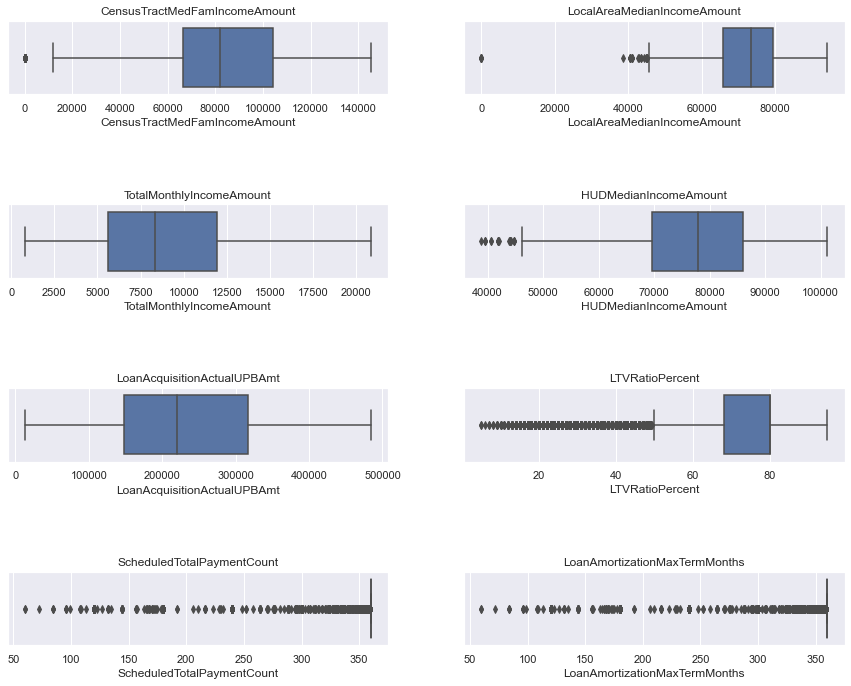

In [59]:
count = 1
plt.subplots(figsize=(15, 25))

for i in range(len(df_win.columns)):
    plt.subplot(8, 2, count)
    sns.boxplot(x=df_win[numeric_cols].iloc[:,i])
    plt.title(numeric_cols[i])
    plt.subplots_adjust(hspace=1.5)
    count +=1
    
plt.show()

## 4. Summary

In the first phase of this project, firstly, we load the data and then try to explore it from different angles to see if there is any missing data and then deal with those missing data. Fortunately, less than %10 of data in most case were missing and we were able to use "Imputation." Finally, we work on the outliers.

In [60]:
#Saving the cleaned dataframe to csv for next phase of project
datapath = r'C:\Users\arash\Desktop\myprojects\Springboard\Capstone (II)\data\cleaned_data.csv'
df.to_csv(datapath, index = None, header=True)